In [1]:
import pandas as pd

In [3]:
df_weight = pd.read_pickle('output/pickle/weight.pkl')
df_hr = pd.read_pickle('output/pickle/hr_intraday.pkl')

## Calculate resting heart rate

In [8]:
df_hr = df_hr.set_index('time')

In [10]:
df_hr['30MinRollingAvg'] = df_hr['value'].rolling('30min').mean()

In [12]:
rhr_daily = df_hr['30MinRollingAvg'].resample('D').min().reset_index()

In [16]:
rhr_daily['RHR'] = rhr_daily['30MinRollingAvg'].round(1)
rhr_daily = rhr_daily.drop(columns='30MinRollingAvg')

In [17]:
rhr_daily

,time,RHR
0,2023-03-11,69.0
1,2023-03-12,58.3
2,2023-03-13,63.4
3,2023-03-14,60.9
4,2023-03-15,62.0
...,...,...
360,2024-03-05,65.9
361,2024-03-06,67.8
362,2024-03-07,66.6
363,2024-03-08,72.0


## Compare weight and resting heart rate

In [31]:
df_weight= df_weight.copy()[['date','weight']]

In [25]:
df_weight.dtypes

date       object
weight    float64
dtype: object

In [32]:
df_weight['date'] = pd.to_datetime(df_weight['date'])

In [50]:
merged = pd.merge(df_weight, rhr_daily, left_on='date', right_on='time')

In [51]:
merged

,date,weight,time,RHR
0,2023-06-12,207.0,2023-06-12,60.4
1,2023-06-12,207.0,2023-06-12,60.4
2,2023-07-16,208.1,2023-07-16,58.2
3,2023-08-04,215.8,2023-08-04,65.2
4,2023-08-16,211.8,2023-08-16,60.2
...,...,...,...,...
70,2024-02-02,224.3,2024-02-02,59.0
71,2024-02-03,222.5,2024-02-03,62.0
72,2024-02-15,224.2,2024-02-15,58.3
73,2024-02-25,224.8,2024-02-25,60.3


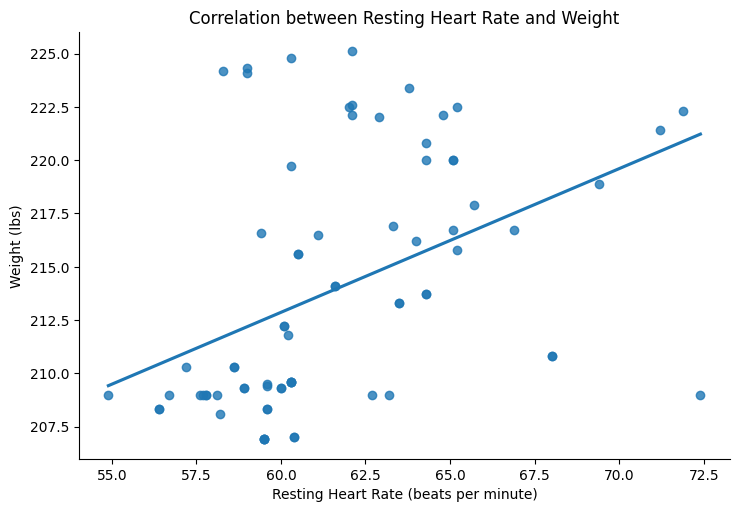

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
sns.lmplot(x='RHR',y='weight',data=merged,aspect=1.5,ci=None)
plt.xlabel('Resting Heart Rate (beats per minute)')
plt.ylabel('Weight (lbs)')
plt.title('Correlation between Resting Heart Rate and Weight')
plt.show()

In [54]:
correlation = merged[['RHR','weight']].corr().iloc[0,1]
print(f"Correlation coefficient between RHR and Weight: {correlation:.2f}")

Correlation coefficient between RHR and Weight: 0.43


<Axes: title={'center': 'Resting Heart Rate (30min Rolling Avg)'}, xlabel='time'>

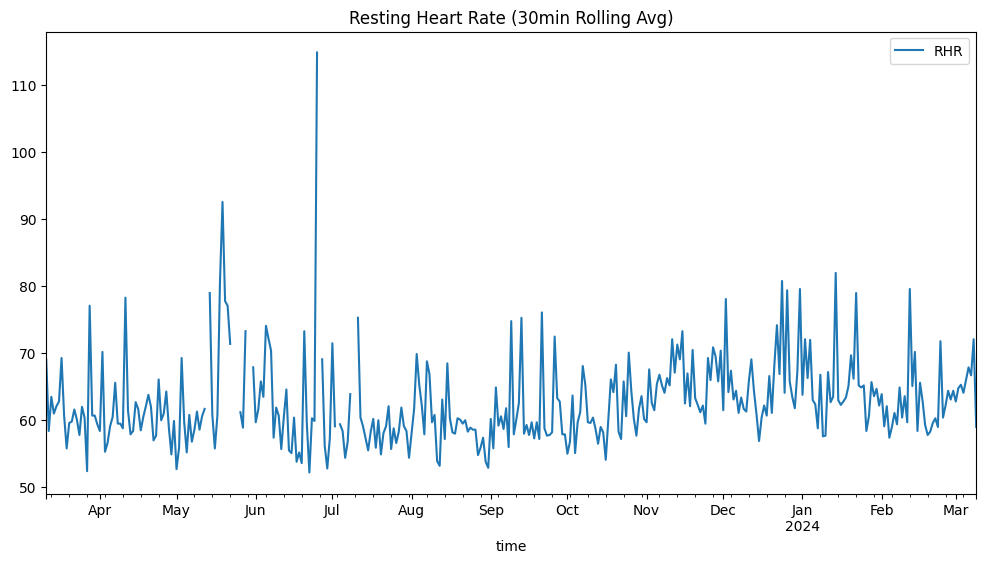

In [55]:
rhr_daily.plot(x='time',y='RHR',figsize=(12,6),title='Resting Heart Rate (30min Rolling Avg)')

<Axes: title={'center': 'Resting Heart Rate (7 Day Rolling Avg)'}, xlabel='time'>

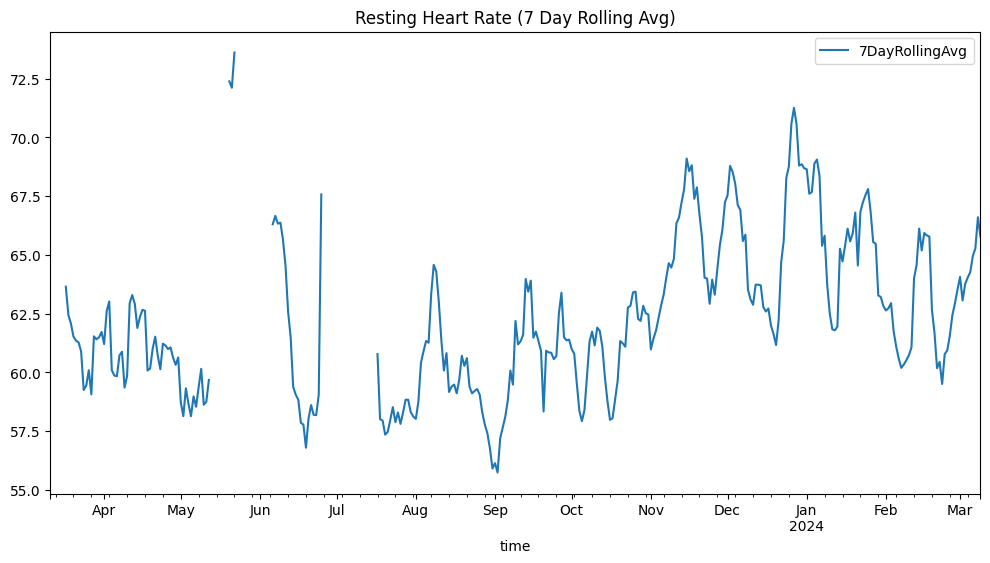

In [58]:
# Moving average of rhr
rhr_daily['7DayRollingAvg'] = rhr_daily['RHR'].rolling(7).mean()
# Plot of moving average
rhr_daily.plot(x='time',y='7DayRollingAvg',figsize=(12,6),title='Resting Heart Rate (7 Day Rolling Avg)')